In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import timeit

In [24]:
img = cv2.imread('runway.jpg', cv2.IMREAD_COLOR)

# to calculate the transformation matrix
input_pts = np.float32([[176,511],[797,513],[391,391],[588,392]])
output_pts = np.float32([[-3,3],[3,3],[-3,13],[3,13]])
#output_pts = np.float32([[176,511],[797,513],[176,0],[797,0]])


# Compute the perspective transform M
H = np.float32(cv2.getPerspectiveTransform(input_pts,output_pts))
print('Homography Matrix: \n', H)

Homography Matrix: 
 [[-5.1275012e-03 -7.0846283e-05  2.5384142e+00]
 [ 8.5683478e-06  4.9511008e-03 -4.1312923e+00]
 [ 1.7854569e-05 -3.0066529e-03  1.0000000e+00]]


0.0035980000000108703


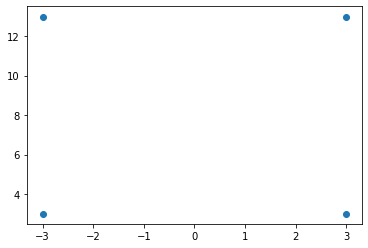

In [22]:
start = timeit.timeit()
## reshape tp (n, 1, 2)
transform_points = input_pts.reshape(-1,1,2).astype(np.float32)

#apply homography transfrom
cartesian_points = cv2.perspectiveTransform(transform_points, H)
reduced_cartesian_points = np.squeeze(cartesian_points, axis=1)

end = timeit.timeit()
print(end - start)

#plot 2d cartesian points (birds eye view)
plt.scatter(reduced_cartesian_points[:,0], reduced_cartesian_points[:,1])